Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train_data=pd.read_csv("W22_P2_train.csv")
test_data=pd.read_csv("W22_P2_test.csv")

Text(0, 0.5, 'Count')

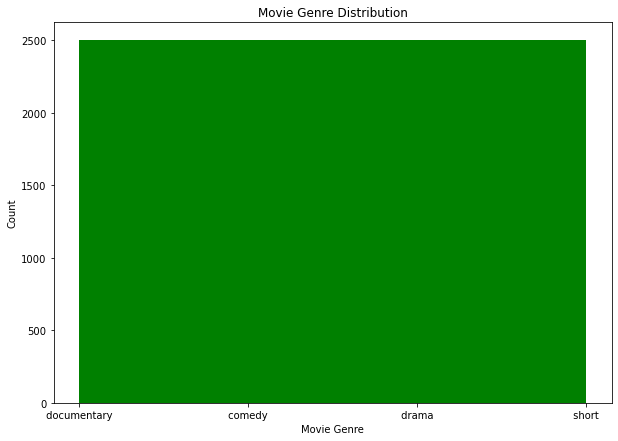

In [3]:
#Genre distribution in train dataset
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 7))
x = train_data["genre"]
  
plt.hist(x, bins = 4, color = "green")
plt.title("Movie Genre Distribution")
plt.xlabel("Movie Genre")
plt.ylabel("Count")

In [4]:
#function for preprocessing the list of description
def preprocess(txt):
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    remove_digits = str.maketrans('', '', string.digits)
    p = re.compile("[" + re.escape(string.punctuation) + "]")
    ps = PorterStemmer()
    txt = txt.lower()
    txt = BAD_SYMBOLS_RE.sub('', txt)
    txt = txt.translate(remove_digits)
    txt = p.sub("", txt)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(txt)
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            w = ps.stem(w)
            filtered_sentence.append(w)        
    return " ".join(filtered_sentence)

In [5]:
#Create a list of preprocessed descriptions from train data
preprocessed_description=[]
for i in range(0,len(train_data)):
    description=preprocess(train_data["description"][i])
    preprocessed_description.append(description)

In [6]:
#Create a list of preprocessed descriptions from test data
preprocessed_test_description=[]
for i in range(0,len(test_data)):
    description=preprocess(test_data["description"][i])
    preprocessed_test_description.append(description)

In [7]:
#Vectorize train data
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(min_df=10,ngram_range=(1,3),max_features=20000)
x=tf.fit_transform(preprocessed_description)

In [8]:
#Encode labels
y=train_data['genre']
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# grid={"estimator__C" : [0.0001, 0.001, 0.01, 0.1], "estimator__penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
model = OneVsRestClassifier(logreg)
# logreg_cv=GridSearchCV(model,param_grid=grid,cv=10)
n_scores = cross_val_score(model, x, y, scoring='accuracy', n_jobs=-1, error_score='raise')

In [10]:
# evaluate model for classification
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.651 (0.012)


In [11]:
model.fit(x,y)

OneVsRestClassifier(estimator=LogisticRegression())

In [12]:
#Vectorize test data
x_test=tf.transform(preprocessed_test_description)

In [13]:
pred=model.predict(x_test)

In [14]:
pred=le.inverse_transform(pred)

In [15]:
cid=list(test_data['id'])
genre=list(pred)

In [16]:
pred_file=test_data
pred_file['genre']=genre

In [17]:
pred_file[['id','genre']].to_csv("LogReg.csv",index=False)